# 360° Business Intelligence & Predictive Growth System

## Objective
Build an end-to-end analytics system integrating sales, customer, and marketing data to generate business insights and predictive intelligence.

## I. Loading Libraries 🔃

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## II. Loading Dataset 📊📉📈

In [6]:
df = pd.read_csv("C:/Users/manav/Desktop/360 BI data.csv")

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## III. Data Cleaning 🧹

In [8]:
# Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Check missing values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Profit Margin'] = df['Profit'] / df['Sales']

## IV. Exploratory Data Analysis (EDA) 🔍

#### 1. 📊 Total Revenue

In [10]:
total_revenue = df['Sales'].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 2297200.8603000003


#### 2. 📊 Sales by Category

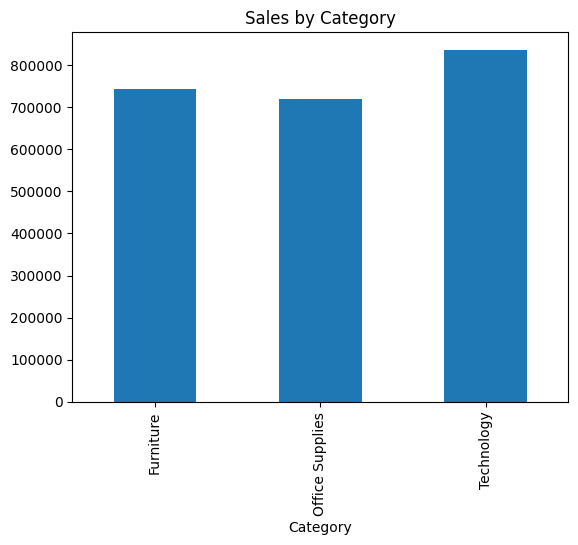

In [11]:
category_sales = df.groupby('Category')['Sales'].sum()

category_sales.plot(kind='bar')
plt.title("Sales by Category")
plt.show()

#### 3. 📊 Profit by Region

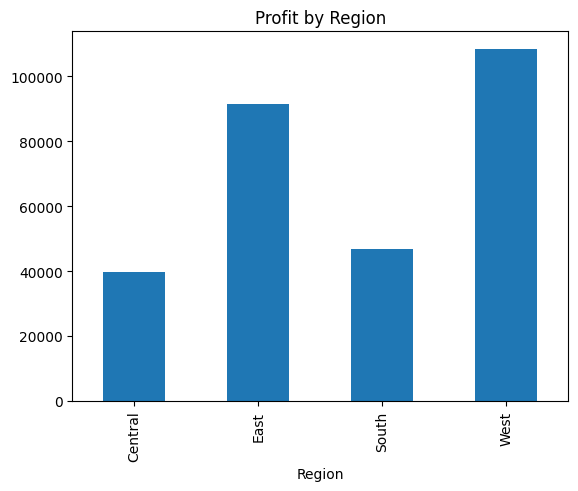

In [12]:
region_profit = df.groupby('Region')['Profit'].sum()

region_profit.plot(kind='bar')
plt.title("Profit by Region")
plt.show()

#### 4. 📊 Monthly Sales Trend

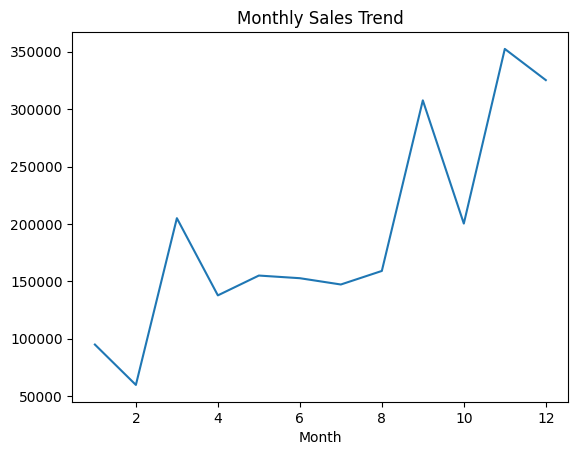

In [14]:
monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.show()

## V. Business KPI Modeling 📊

#### 1. 📊 Revenue Growth

In [15]:
yearly_revenue = df.groupby('Year')['Sales'].sum().reset_index()
yearly_revenue

,Year,Sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


In [16]:
yearly_revenue['Growth %'] = yearly_revenue['Sales'].pct_change() * 100
yearly_revenue

,Year,Sales,Growth %
0,2014,484247.4981,NaN
1,2015,470532.5090,-2.832227
2,2016,609205.5980,29.471521
3,2017,733215.2552,20.355962


#### 2. 👥 Customer Retention Rate

In [17]:
customer_orders = df.groupby('Customer ID')['Order ID'].nunique().reset_index()
customer_orders.columns = ['Customer ID', 'Total Orders']

repeat_customers = customer_orders[customer_orders['Total Orders'] > 1].shape[0]
total_customers = customer_orders.shape[0]

retention_rate = (repeat_customers / total_customers) * 100
print("Customer Retention Rate:", retention_rate)

Customer Retention Rate: 98.48675914249685


#### 3. 💰 Customer Lifetime Value (LTV)

In [18]:
avg_order_value = df['Sales'].mean()

purchase_frequency = df.groupby('Customer ID')['Order ID'].nunique().mean()

ltv = avg_order_value * purchase_frequency

print("Estimated Customer Lifetime Value:", ltv)

Estimated Customer Lifetime Value: 1451.9025550567037


#### 4. 📢 Simulated Customer Acquisition Cost (CAC)

In [19]:
marketing_spend = 500000  # simulated

new_customers = total_customers

cac = marketing_spend / new_customers

print("Customer Acquisition Cost:", cac)

Customer Acquisition Cost: 630.517023959647


#### 5. 📈 Profit Margin

In [20]:
profit_margin = (df['Profit'].sum() / df['Sales'].sum()) * 100
print("Overall Profit Margin:", profit_margin)

Overall Profit Margin: 12.467217240315604


## VI. Sales Forecasting (Revenue Prediction) 📊📉📈

In [21]:
# Select numeric features
model_df = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Year', 'Month']]

model_df = model_df.dropna()

model_df.head()

,Sales,Quantity,Discount,Profit,Year,Month
0,261.9600,2,0.00,41.9136,2016,11
1,731.9400,3,0.00,219.5820,2016,11
2,14.6200,2,0.00,6.8714,2016,6
3,957.5775,5,0.45,-383.0310,2015,10
4,22.3680,2,0.20,2.5164,2015,10


#### 🔷 Step 1: Prepare Data for Modeling

In [22]:
X = model_df.drop('Sales', axis=1)
y = model_df['Sales']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### 🔷 Step 2: Train Random Forest Model

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### 🔷 Step 3: Make Predictions

In [25]:
y_pred = rf.predict(X_test)

#### 🔷 Step 4: Evaluate Model

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 518.0344741783218
R² Score: 0.5456913885530768


#### 🔷 Step 5: Compare Actual vs Predicted

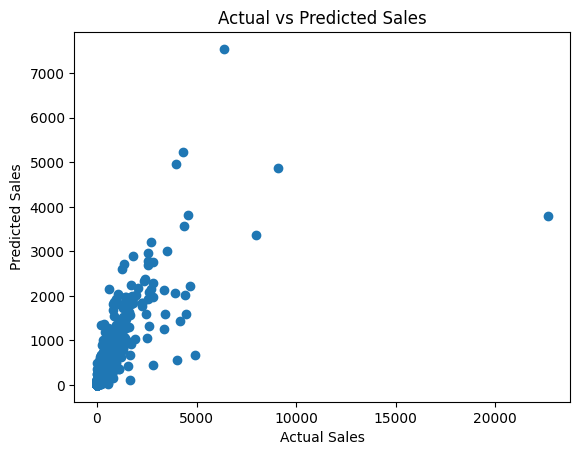

In [27]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

## VII. Customer Churn Prediction Model

#### 🎯 Step 1: Define Churn
Since Superstore doesn’t have churn, we define it logically: A customer is considered churned if they have not purchased in the last 90 days.
This is realistic and industry-standard.

In [28]:
# Find last purchase date per customer
last_purchase = df.groupby('Customer ID')['Order Date'].max().reset_index()

# Find dataset latest date
latest_date = df['Order Date'].max()

last_purchase['Days Since Last Purchase'] = (
    latest_date - last_purchase['Order Date']
).dt.days

last_purchase.head()

,Customer ID,Order Date,Days Since Last Purchase
0,AA-10315,2017-06-29,184
1,AA-10375,2017-12-11,19
2,AA-10480,2017-04-15,259
3,AA-10645,2017-11-05,55
4,AB-10015,2016-11-10,415


In [29]:
# If no purchase in 90+ days → churn = 1
last_purchase['Churn'] = last_purchase['Days Since Last Purchase'].apply(
    lambda x: 1 if x > 90 else 0
)

last_purchase['Churn'].value_counts()

Churn
0    436
1    357
Name: count, dtype: int64

#### 🎯 Step 2: Merge with Customer Features

In [30]:
customer_features = df.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Discount': 'mean',
    'Order ID': 'nunique'
}).reset_index()

customer_features.columns = [
    'Customer ID',
    'Total Sales',
    'Total Profit',
    'Total Quantity',
    'Avg Discount',
    'Total Orders'
]

customer_features.head()

,Customer ID,Total Sales,Total Profit,Total Quantity,Avg Discount,Total Orders
0,AA-10315,5563.560,-362.8825,30,0.090909,5
1,AA-10375,1056.390,277.3824,41,0.080000,9
2,AA-10480,1790.512,435.8274,36,0.016667,4
3,AA-10645,5086.935,857.8033,64,0.063889,6
4,AB-10015,886.156,129.3465,13,0.066667,3


In [31]:
churn_df = customer_features.merge(
    last_purchase[['Customer ID', 'Churn']],
    on='Customer ID',
    how='left'
)

churn_df.head()

,Customer ID,Total Sales,Total Profit,Total Quantity,Avg Discount,Total Orders,Churn
0,AA-10315,5563.560,-362.8825,30,0.090909,5,1
1,AA-10375,1056.390,277.3824,41,0.080000,9,0
2,AA-10480,1790.512,435.8274,36,0.016667,4,1
3,AA-10645,5086.935,857.8033,64,0.063889,6,0
4,AB-10015,886.156,129.3465,13,0.066667,3,1


#### 🎯 Step 3: Build Classification Model

In [32]:
X = churn_df.drop(['Customer ID', 'Churn'], axis=1)
y = churn_df['Churn']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [34]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
y_pred = clf.predict(X_test)

In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.559748427672956

Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.55      0.60        97
           1       0.45      0.58      0.51        62

    accuracy                           0.56       159
   macro avg       0.56      0.56      0.55       159
weighted avg       0.58      0.56      0.57       159



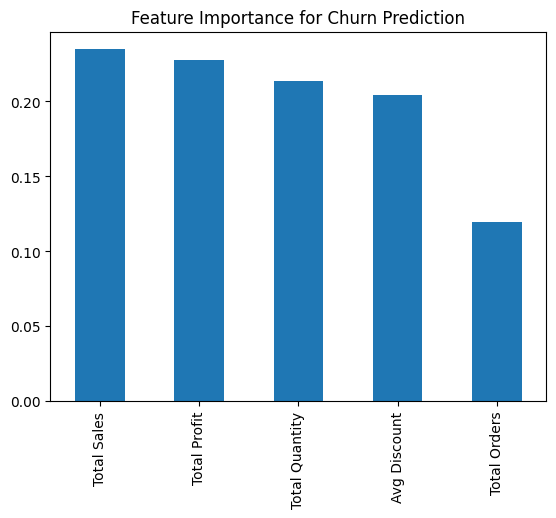

In [37]:
feature_importance = pd.Series(
    clf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.plot(kind='bar')
plt.title("Feature Importance for Churn Prediction")
plt.show()

## VIII.🔥 Business Insight Summary Section

#### 1.📊 Revenue Insights

In [38]:
total_revenue = df['Sales'].sum()
total_profit = df['Profit'].sum()
profit_margin = (total_profit / total_revenue) * 100

print("Total Revenue:", round(total_revenue, 2))
print("Total Profit:", round(total_profit, 2))
print("Overall Profit Margin (%):", round(profit_margin, 2))

Total Revenue: 2297200.86
Total Profit: 286397.02
Overall Profit Margin (%): 12.47


In [39]:
top_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("Top Performing Category:\n")
print(top_category)

Top Performing Category:

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64


#### 2. 👥 Customer Insights

In [40]:
top_customers = df.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Revenue:\n")
print(top_customers)

Top 10 Customers by Revenue:

Customer ID
SM-20320    25043.050
TC-20980    19052.218
RB-19360    15117.339
TA-21385    14595.620
AB-10105    14473.571
KL-16645    14175.229
SC-20095    14142.334
HL-15040    12873.298
SE-20110    12209.438
CC-12370    12129.072
Name: Sales, dtype: float64


In [41]:
# Predict churn probabilities
churn_prob = clf.predict_proba(X_test)[:, 1]

churn_risk_df = pd.DataFrame({
    'Customer ID': churn_df.loc[X_test.index, 'Customer ID'],
    'Churn Probability': churn_prob
})

high_risk_customers = churn_risk_df.sort_values(
    by='Churn Probability', ascending=False
).head(10)

print("High Risk Customers:\n")
print(high_risk_customers)

High Risk Customers:

    Customer ID  Churn Probability
779    VG-21805               0.93
49     AR-10570               0.92
456    LD-16855               0.89
597    PK-19075               0.89
76     BE-11410               0.87
760    TS-21085               0.86
266    EL-13735               0.86
750    TH-21115               0.83
334    HZ-14950               0.82
10     AB-10600               0.82


#### 3. 📈 Forecast Insight

In [42]:
forecast_comparison = pd.DataFrame({
    'Actual Sales': y_test,
    'Predicted Sales': y_pred
})

forecast_comparison.head()

,Actual Sales,Predicted Sales
137,1,1
198,0,0
739,1,1
583,0,1
655,0,1


#### 4.📊 Regional Performance

In [43]:
region_performance = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).sort_values(by='Sales', ascending=False)

print("Regional Performance:\n")
print(region_performance)

Regional Performance:

               Sales       Profit
Region                           
West     725457.8245  108418.4489
East     678781.2400   91522.7800
Central  501239.8908   39706.3625
South    391721.9050   46749.4303


#### 5. 🧠 Executive Recommendations

In [44]:
print("\n--- Strategic Recommendations ---\n")

if profit_margin < 10:
    print("• Profit margin is low. Consider optimizing discount strategy.")
else:
    print("• Profit margin is healthy. Focus on scaling high-performing segments.")

print("• Focus retention campaigns on high churn probability customers.")
print("• Increase marketing investment in top-performing regions.")
print("• Optimize product mix based on category profitability.")
print("• Use sales forecasting model for quarterly planning.")


--- Strategic Recommendations ---

• Profit margin is healthy. Focus on scaling high-performing segments.
• Focus retention campaigns on high churn probability customers.
• Increase marketing investment in top-performing regions.
• Optimize product mix based on category profitability.
• Use sales forecasting model for quarterly planning.


## IX. Conclusion
This project demonstrates a full end-to-end Business Intelligence and Predictive Analytics pipeline including:
Data cleaning & transformation
KPI modeling
Revenue analysis
Sales forecasting
Customer churn prediction
Strategic business recommendations
The system integrates business intelligence and machine learning to support data-driven growth decisions.